<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/JZUnit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is like a flow chart. It works by breaking down a data set into smaller sections based on conditions/features, which makes it easier to predict a target variable. The tree starts at the top with a "root node", and splits into branches leading to more nodes. Eventually it leads to "leaf nodes" at the bottom which are nodes with no children.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth is the number of levels from the root to the leaf node. More layers means we capture more patterns in the data, but this also introduces the problem of overfitting. When you don't have a lot of data points, it's better to have less layers

**Task4:**

How are BART models similar and different from a decision tree?

Similar: they are both tree models

Different: BART models use multiple decision trees. You can put priors on the depth of each tree to ensure that they will all be shallow and not overfit. Decision trees have a max depth, BART models don't

**Task5**:

Why would we use a BART model instead of a decision tree?

BART is made of multiple decision trees, and randomly alters each tree based on the other trees (boosting). This allows it to reduce underfitting. You can also use priors to reduce overfitting. Individual decision trees are very prone to overfitting and unable to generalize if you let it memorize the data set

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
!pip install preliz

!pip install pymc-bart


In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [ ]:
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


In [ ]:
X = penguins[['flipper_length', 'bill_depth', 'bill_length']]
Y = penguins["body_mass"].to_numpy()

In [ ]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

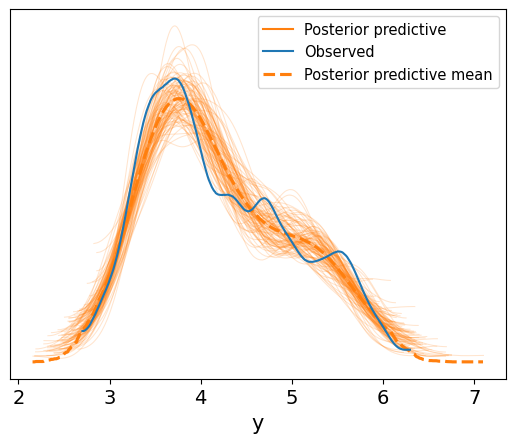

In [ ]:

#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguins,model_penguins, extend_inferencedata=True)
az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

In [ ]:

X = penguins["flipper_length"].to_numpy().reshape(-1, 1)
Y = penguins["body_mass"].to_numpy()

In [ ]:

with pm.Model() as model_penguins2:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_penguins2 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

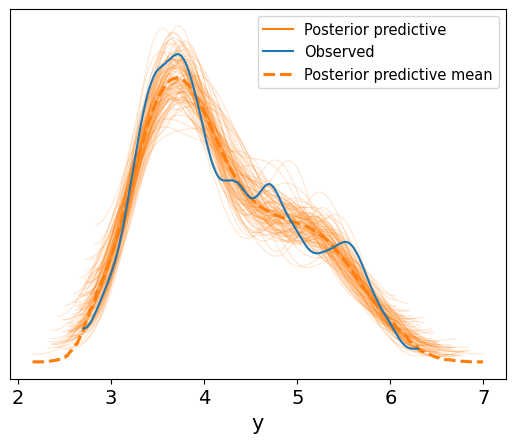

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguins2, model_penguins2, extend_inferencedata=True)
az.plot_ppc(idata_penguins2, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [ ]:

posterior_mean = idata_penguins2.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguins2, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_penguins2, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


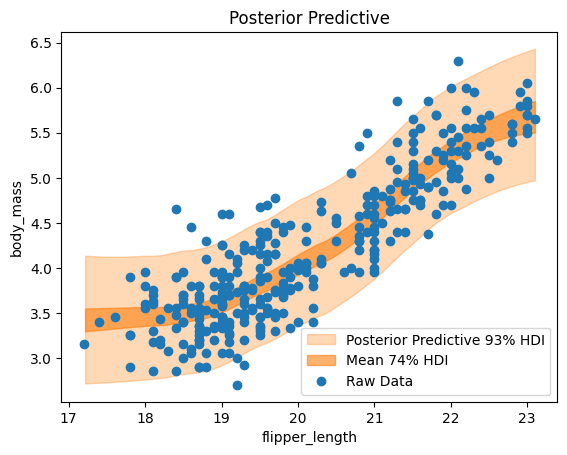

In [ ]:

idx = np.argsort(X[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive 93% HDI"},
)

az.plot_hdi(
    x=X[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean 74% HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);


**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

From the upwards trend, the model is predicting that on average, as flipper length increases, body mass will also increase. However, it seems to be more uncertain about predicting body mass for lower and higher flipper lengths (the ends of the plot) as the shaded orange area widens there. I think the model captures the true association for the most part. Most of the raw data is within the posterior predictive, which means that the predictions line up with the observations. However, the slightly curved trend shows that the flipper length and body mass relationship is not strictly linear, and that there are likely other variables that affect flipper length. It captures the general positive relationship, but there are nuances that could probably be modeled better by including other variables.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

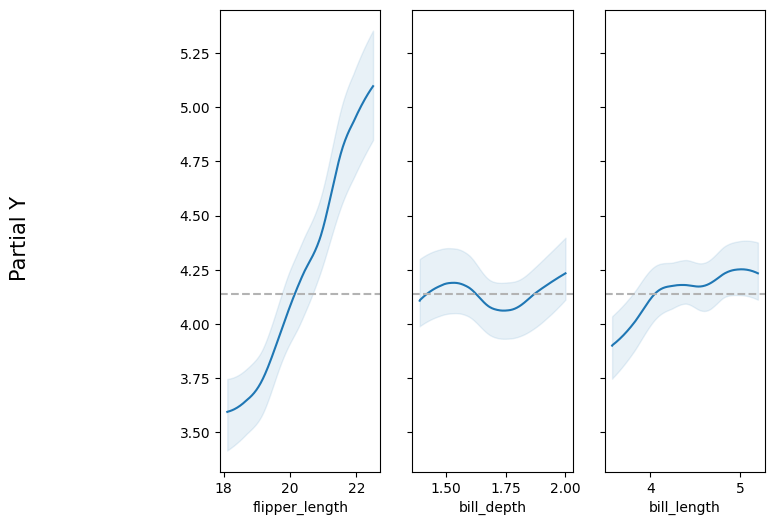

In [ ]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

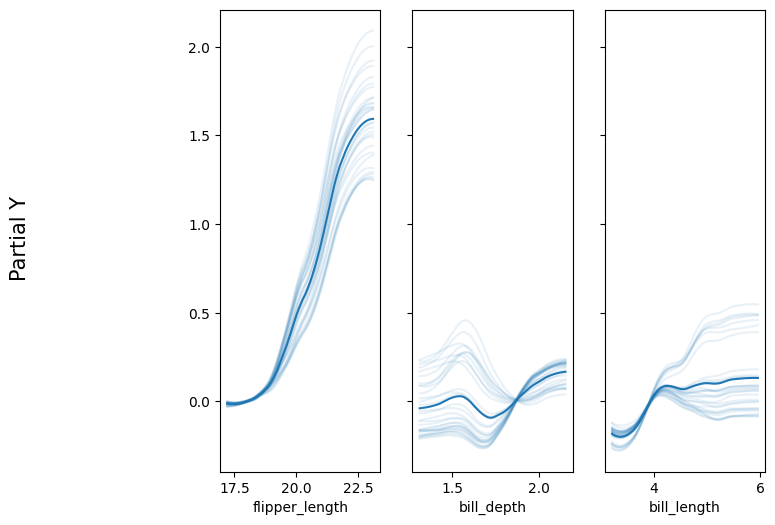

In [ ]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [ ]:
vi_penguins = pmb.compute_variable_importance(idata_penguins, μ_, X)

<Axes: ylabel='R²'>

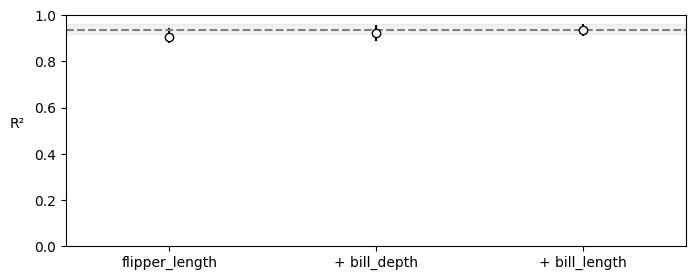

In [ ]:
pmb.plot_variable_importance(vi_penguins)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

1. Flipper length is the most important variable in predicting body mass, as seen by the positive relationship shown in the pdp and ice plots. The importance score plot also shows that flipper length would give us the most prediction accuracy, because it has the biggest jump up in R^2

2.
Flipper length - positive, mostly linear relationship with body mass

bill depth - non-linear, more complex, weaker positive relationship, suggesting that
interactions with other variables might come into play

bill length - stronger positive relationship than bill depth, but still complex

3. The fact that the bill length and depth relationships are nonlinear shows that they are probably affected by other variables